In [98]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [195]:
TNX_full = pd.read_csv('./../../data/economic_data/TNX_log_returns.csv', index_col='Date')

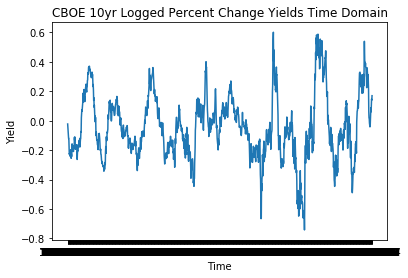

In [239]:
plt.plot_date(TNX_full.index, TNX_full['Log Returns'], '-')
plt.title('CBOE 10yr Logged Percent Change Yields Time Domain')
plt.xlabel('Time')
plt.ylabel('Yield')
plt.show()

In [49]:
RUT.index

Index(['1992-12-30', '1993-01-06', '1993-01-13', '1993-01-20', '1993-01-27',
       '1993-02-03', '1993-02-10', '1993-02-17', '1993-02-24', '1993-03-03',
       ...
       '2017-12-13', '2017-12-20', '2017-12-27', '2018-01-03', '2018-01-10',
       '2018-01-17', '2018-01-24', '2018-01-31', '2018-02-07', '2018-02-14'],
      dtype='object', name='Date', length=1312)

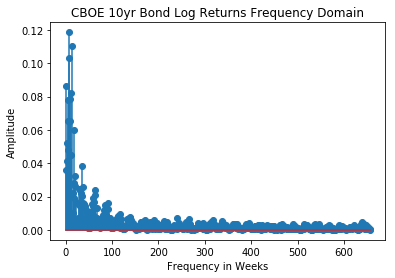

In [201]:
#define sampling rate
srate = 1312

#time vector, number of time points
RUTtx = TNX_full.index
RUTn = len(RUTtx)

#plt.plot(RUTtx, RUT['Log Returns'])

#Compute Fourier Coefficients
RUTcoefs = fft(TNX_full['Log Returns'])/RUTn

# Compute frequency vector
RUTfreq = np.linspace(0, srate/2, int(np.floor(RUTn/2)+1))

# extract amplitudes
RUTamps = 2*np.abs(RUTcoefs)

# Show Frequency Domain
plt.stem(RUTfreq, RUTamps[0:int(np.floor(RUTn/2)+1)])
plt.title('CBOE 10yr Bond Log Returns Frequency Domain')
plt.xlabel('Frequency in Weeks')
plt.ylabel('Amplitude')
plt.show()


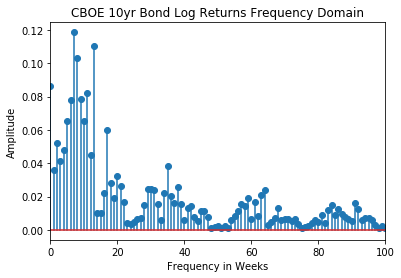

In [200]:
# Show Frequency Domain
plt.stem(RUTfreq, RUTamps[0:int(np.floor(RUTn/2)+1)])
plt.title('CBOE 10yr Bond Log Returns Frequency Domain')
plt.xlabel('Frequency in Weeks')
plt.ylabel('Amplitude')
plt.xlim([0,100])
plt.show()

Consider this: http://www.atmo.ttu.edu/wiens/Classes/ATMO5352/Lectures/regression.pdf

Regression of CBOE 10 Year Bond Yields vs Total Student Loans

In [176]:
df1 = pd.read_csv("./../../data/economic_data/^TNX.csv", index_col = "Date")
TNX = df1.loc[dates[:-1]]

In [54]:
#normalize data
df1_norm = (df1 - df1.mean()) / (df1.max() - df1.min())
TNXnorm = pd.DataFrame(data = df1_norm['Adj Close'], index = df1_norm.index)

In [15]:
df2 = pd.read_csv("./../../data/university_financial_aid/sfa9916.csv")

In [57]:
# Thanks Vincent

# file on university financial data
df = pd.read_csv("./../../data/university_financial_aid/sfa9916_with_types.csv")


#purchesing power per dollar to convert USD to same value
df_PPD = pd.read_csv("./../../data/economic_data/CPI_PurchPower.csv") 

dates = ['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01', 
		 '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01', 
		 '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2018-01-01']

df_PPD = df_PPD.loc[(df_PPD['DATE'].isin(dates))]

PPD = df_PPD['CUUR0000SA0R'].tolist()

base_year_2018 = PPD[len(PPD)-1]
PPD = PPD[:len(PPD)-1]

adjustments = [val/base_year_2018 for val in PPD]


def extractVariableStatistics(df, varName, yearFirst, numYears, adjustments, mean):
	#generate column names
	_cols = [varName]*numYears
	yearFall   = int(yearFirst[:2])
	yearSpring = int(yearFirst[2:])
	for i in range(numYears):
		_cols[i]   = str(yearFall).zfill(2) + str(yearSpring).zfill(2) + "_" + _cols[i]
		yearFall   = 0 if yearFall   == 99 else yearFall+1
		yearSpring = 0 if yearSpring == 99 else yearSpring+1
	
	_all			= df[_cols]
	_public			= df.loc[(df['TYPE'] == 'public'), _cols]
	_not_for_profit = df.loc[(df['TYPE'] == 'not-for-profit'), _cols]
	_for_profit 	= df.loc[(df['TYPE'] == 'for-profit'), _cols]

	result_all            = _all.sum().tolist()
	result_public         = _public.sum().tolist()
	result_not_for_profit = _not_for_profit.sum().tolist()
	result_for_profit     = _for_profit.sum().tolist()

	if adjustments != []:
		result_all            = [result_all[i]*adjustments[i] for i in range(len(result_all))]
		result_public         = [result_public[i]*adjustments[i] for i in range(len(result_public))]
		result_not_for_profit = [result_not_for_profit[i]*adjustments[i] for i in range(len(result_not_for_profit))]
		result_for_profit     = [result_for_profit[i]*adjustments[i] for i in range(len(result_for_profit))]


	if mean == True:
		n_non_zero_all            = _all.astype(bool).sum(axis=0)
		n_non_zero_public         = _public.astype(bool).sum(axis=0)
		n_non_zero_not_for_profit = _not_for_profit.astype(bool).sum(axis=0)
		n_non_zero_for_profit     = _for_profit.astype(bool).sum(axis=0)

		result_all            = [result_all[i]/n_non_zero_all[i] for i in range(len(result_all))]
		result_public         = [result_public[i]/n_non_zero_public[i] for i in range(len(result_public))]
		result_not_for_profit = [result_not_for_profit[i]/n_non_zero_not_for_profit[i] for i in range(len(result_not_for_profit))]
		result_for_profit     = [result_for_profit[i]/n_non_zero_for_profit[i] for i in range(len(result_for_profit))]

	return (result_all, result_public, result_not_for_profit, result_for_profit)



n_receiving_aid        = extractVariableStatistics(df, 'ANYAIDN', '9900', 17, [], False)

n_loans                = extractVariableStatistics(df, 'LOAN_N', '9900', 17, [], False)
avg_loan_amount        = extractVariableStatistics(df, 'LOAN_A', '9900', 17, adjustments, True)

n_fed_grant            = extractVariableStatistics(df, 'FGRNT_N', '9900', 17, [], False)
avg_fed_grant_amount   = extractVariableStatistics(df, 'FGRNT_N', '9900', 17, adjustments, True)

n_state_grant          = extractVariableStatistics(df, 'SGRNT_N', '9900', 17, [], False)
avg_state_grant_amount = extractVariableStatistics(df, 'SGRNT_N', '9900', 17, adjustments, True)


n_uni_grant	           = extractVariableStatistics(df, 'IGRNT_N', '9900', 17, [], False)
avg_uni_grant_amount   = extractVariableStatistics(df, 'IGRNT_N', '9900', 17, adjustments, True)

bins = ['99-00','00-01','01-02','02-03','03-04','04-05',
		'05-06','06-07','07-08','08-09','09-10','10-11',
	 	'11-12','12-13','13-14','14-15','15-16']

IndexError: list index out of range

In [136]:
dic_n = {'All':n_loans[0], 'Public':n_loans[1], 'Not For Profit':n_loans[2], 'For Profit':n_loans[3]}
dic_a = {'All':avg_loan_amount[0], 'Public':avg_loan_amount[1], 'Not For Profit':avg_loan_amount[2], 'For Profit':avg_loan_amount[3]}
dates = ['2000-01-05', '2001-01-03', '2002-01-02', '2003-01-01', '2004-01-07', '2005-01-05', 
		 '2006-01-04', '2007-01-03', '2008-01-02', '2009-01-07', '2010-01-06', '2011-01-05', 
		 '2012-01-04', '2013-01-02', '2014-01-01', '2015-01-07', '2016-01-06', '2018-01-01']

In [221]:
def getlogreturns(df):
    df = np.log(df)
    buy = df.iloc[:-1].values
    sell = df.iloc[1:].values
    return sell - buy

In [137]:
#create and normalize data
df2 = pd.DataFrame(data = dic_n, index = dates[:-1])
df3 = pd.DataFrame(data = dic_a, index=dates[:-1])



df2_norm = (df2 - df2.mean()) / (df2.max() - df2.min())
TNXnorm2 = TNXnorm.loc[dates[:-1]]


In [152]:
dic_t = {'All':df2['All']*df3['All'], 'Public':df2['Public']*df3['Public'], 
         'Not For Profit':df2['Not For Profit']*df3['Not For Profit'], 'For Profit':df2['For Profit']*df3['For Profit']}
total_loans = pd.DataFrame(data = dic_t, index=dates[:-1])
loans_norm = (total_loans - total_loans.mean()) / (total_loans.max() - total_loans.min())


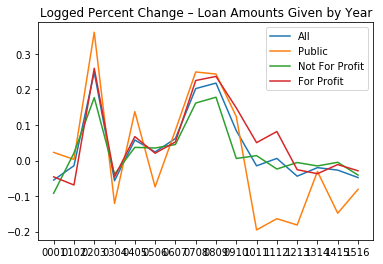

In [259]:
log_loans = getlogreturns(total_loans)
labels=['All', 'Public', 'Not For Profit', 'For Profit']
bins = ["0001","0102","0203","0304","0405","0506","0607","0708","0809","0910","1011","1112","1213","1314","1415","1516"]

for i, label in zip(range(len(log_loans)), labels):
    plt.plot(bins, log_loans[:,i], label=label)
plt.title("Logged Percent Change – Loan Amounts Given by Year")
plt.legend()
plt.show()

17

In [223]:
pd.DataFrame(data=log_loans)

,0,1,2,3
0,-0.054948,0.022789,-0.092048,-0.045994
1,-0.014655,0.003154,0.021090,-0.068822
2,0.248203,0.360717,0.176900,0.259372
3,-0.056828,-0.120691,-0.038641,-0.046211
4,0.057796,0.137504,0.036979,0.067315
5,0.024004,-0.074124,0.035114,0.020458
6,0.061827,0.084949,0.044995,0.052288
7,0.202245,0.248971,0.161585,0.224990
8,0.217700,0.243108,0.178038,0.236463
9,0.083963,0.123605,0.005772,0.147966


Text(0,0.5,'Loans')

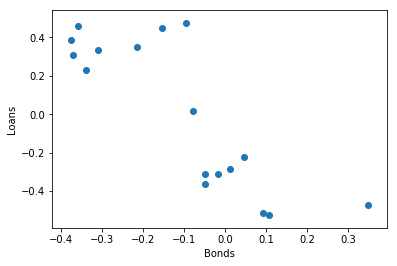

In [243]:
plt.scatter(TNXnorm2["Adj Close"], loans_norm['All'])

plt.xlabel('Bonds')
plt.ylabel('Loans')
#plt.plot(TNXnorm2.index, df2_norm['All'])

In [247]:
X = TNXnorm2['Adj Close']
y = loans_norm['All']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

/Users/blakestanford/Desktop/Code/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    All   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     32.32
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           4.32e-05
Time:                        15:36:58   Log-Likelihood:                 2.3393
No. Observations:                  17   AIC:                           -0.6786
Df Residuals:                      15   BIC:                            0.9879
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1671      0.062     -2.700      0.016      -0.299      -0.035
Adj Close     -1.5686      0.276     -5.686      0.000      -2.157      -0.981
==============================================================================
Omnibus:                        3.132   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.076
Skew:                           0.852   Prob(JB):                        0.354
Kurtosis:                       2.837   Cond. No.                         5.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
corr = TNXnorm2['Adj Close'].corr(loans_norm['All'])
corr

-0.82646371262737428

Text(0.5,1,'Total Loan Amounts Given by School Type')

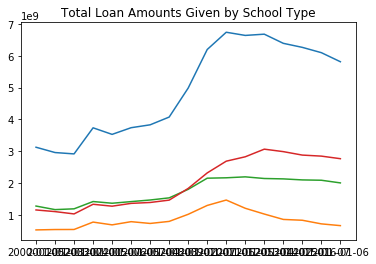

In [238]:

plt.plot(total_loans)
plt.title("Total Loan Amounts Given by School Type")

In [229]:
"""
Takes a list of dataframe columns as input
"""
freqs, amps = [], []
def fourier(lst):
    
    #fourier transform on residuals

    #define sampling rate
    srate = 17

    #time vector, number of time points
    restx = total_loans.index
    n = len(restx)

    for i in range(len(lst)):
        #Compute Fourier Coefficients
        #zero padding for better sampling 
        #divide by sqrt(n) due to normalized data
        coefs = fft(lst[i], 2*n )/np.sqrt(n)
    

        # Compute frequency vector
        freq = np.linspace(0, srate/2, int(np.floor(n/2)+1))

        # extract amplitudes
        amp = 2*np.abs(coefs)
        
        freqs.append(freq)
        amps.append(amp)
    
    return freqs, amps

# Show Frequency Domain
#plt.stem(freq, amps[0:int(np.floor(n/2)+1)])
#plt.title('Frequency Domain – Residuals of Regression')
#plt.xlabel('Frequency (years)')
#plt.ylabel('Amplitude')
#plt.show()

In [224]:
lst_reg = [total_loans['All'], total_loans['Public'], total_loans['Not For Profit'], total_loans['For Profit'], TNX['Adj Close']]
lst_norm = [loans_norm['All'], loans_norm['Public'], loans_norm['Not For Profit'], loans_norm['For Profit'], TNXnorm2['Adj Close']]
lst_log = [log_loans[:,0], log_loans[:,1], log_loans[:,2], log_loans[:,3], TNX_full['Log Returns']]

In [252]:
csvdic = {'All':log_loans[:,0], 'Public':log_loans[:,1], 'Not For Profit':log_loans[:,2], 'For Profit':log_loans[:,3]}
csvdf = pd.DataFrame(data = csvdic, index = TNX.index[:-1])
csvdf.to_csv('log_loans.csv')

In [231]:
fourier(lst_log)

([array([ 0.    ,  1.0625,  2.125 ,  3.1875,  4.25  ,  5.3125,  6.375 ,
          7.4375,  8.5   ]),
  array([ 0.    ,  1.0625,  2.125 ,  3.1875,  4.25  ,  5.3125,  6.375 ,
          7.4375,  8.5   ]),
  array([ 0.    ,  1.0625,  2.125 ,  3.1875,  4.25  ,  5.3125,  6.375 ,
          7.4375,  8.5   ]),
  array([ 0.    ,  1.0625,  2.125 ,  3.1875,  4.25  ,  5.3125,  6.375 ,
          7.4375,  8.5   ]),
  array([ 0.    ,  1.0625,  2.125 ,  3.1875,  4.25  ,  5.3125,  6.375 ,
          7.4375,  8.5   ])],
 [array([ 0.30133076,  0.33387397,  0.32271227,  0.21038367,  0.16216526,
          0.20774529,  0.24860956,  0.22556134,  0.0976607 ,  0.06570787,
          0.12372834,  0.20496102,  0.20962341,  0.13059592,  0.16866949,
          0.17877593,  0.13665918,  0.12999398,  0.13665918,  0.17877593,
          0.16866949,  0.13059592,  0.20962341,  0.20496102,  0.12372834,
          0.06570787,  0.0976607 ,  0.22556134,  0.24860956,  0.20774529,
          0.16216526,  0.21038367,  0.32271227,  0

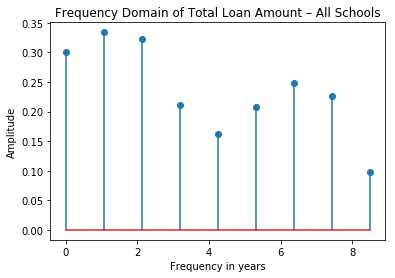

In [232]:
plt.stem(freqs[0], amps[0][0:int(np.floor(n/2)+1)])
plt.xlabel('Frequency in years')
plt.ylabel('Amplitude')
plt.title('Frequency Domain of Total Loan Amount – All Schools')
plt.show()

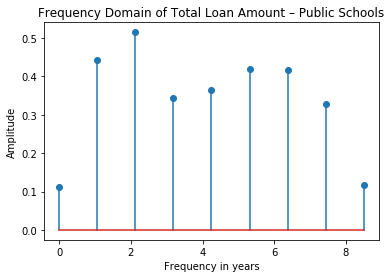

In [233]:
plt.stem(freqs[1], amps[1][0:int(np.floor(n/2)+1)])
plt.xlabel('Frequency in years')
plt.ylabel('Amplitude')
plt.title('Frequency Domain of Total Loan Amount – Public Schools')
plt.show()

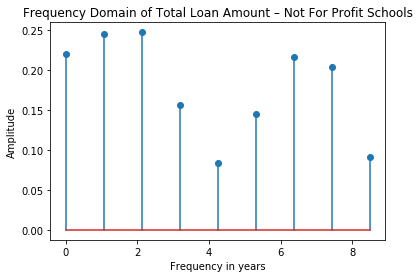

In [234]:
plt.stem(freqs[2], amps[2][0:int(np.floor(n/2)+1)])
plt.xlabel('Frequency in years')
plt.ylabel('Amplitude')
plt.title('Frequency Domain of Total Loan Amount – Not For Profit Schools')
plt.show()

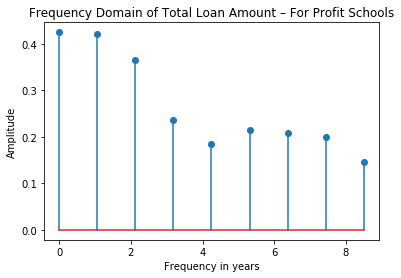

In [235]:
plt.stem(freqs[3], amps[3][0:int(np.floor(n/2)+1)])
plt.xlabel('Frequency in years')
plt.ylabel('Amplitude')
plt.title('Frequency Domain of Total Loan Amount – For Profit Schools')
plt.show()

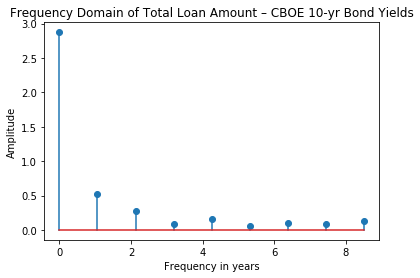

In [236]:
plt.stem(freqs[4], amps[4][0:int(np.floor(n/2)+1)])
plt.xlabel('Frequency in years')
plt.ylabel('Amplitude')
plt.title('Frequency Domain of Total Loan Amount – CBOE 10-yr Bond Yields')
plt.show()